## Factor Discovery

## Data Loading

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
gsw = pd.read_excel('data/gsw_yields.xlsx', index_col=0, parse_dates=True)

maturities = [2,5,10]
yields = gsw[maturities].dropna()
yields.columns = ['2Y','5Y','10Y']

yields = yields.loc['2015':]

print(f"Date range: {yields.index.min().date()} to {yields.index.max().date()}")
print(f"Observations: {len(yields)}")
yields.tail()

Date range: 2015-01-02 to 2025-12-26
Observations: 2747


,2Y,5Y,10Y
Date,,,
2025-12-19,3.4741,3.6742,4.2367
2025-12-22,3.4956,3.6938,4.2475
2025-12-23,3.5287,3.7140,4.2410
2025-12-24,3.5278,3.7004,4.2158
2025-12-26,3.4816,3.6707,4.2193


## Compute and PCA

In [19]:
yields_diff = yields.diff(periods=1).dropna()
yields_diff.tail()

,2Y,5Y,10Y
Date,,,
2025-12-19,0.0223,0.0326,0.0306
2025-12-22,0.0215,0.0196,0.0108
2025-12-23,0.0331,0.0202,-0.0065
2025-12-24,-0.0009,-0.0136,-0.0252
2025-12-26,-0.0462,-0.0297,0.0035


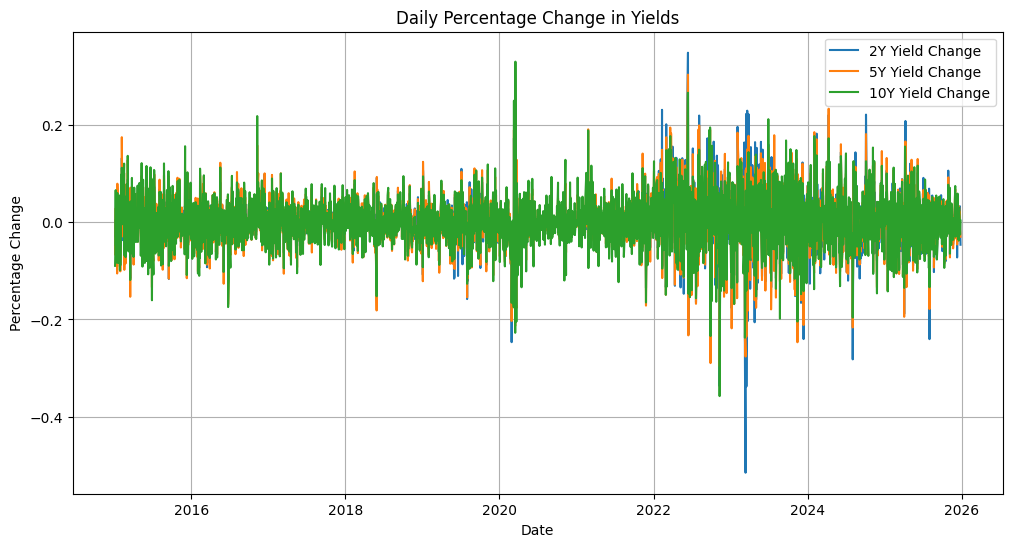

In [20]:
plt.figure(figsize=(12,6))
plt.plot(yields_diff.index, yields_diff['2Y'], label='2Y Yield Change')
plt.plot(yields_diff.index, yields_diff['5Y'], label='5Y Yield Change')
plt.plot(yields_diff.index, yields_diff['10Y'], label='10Y Yield Change')
plt.title('Daily Percentage Change in Yields')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid()
plt.show()

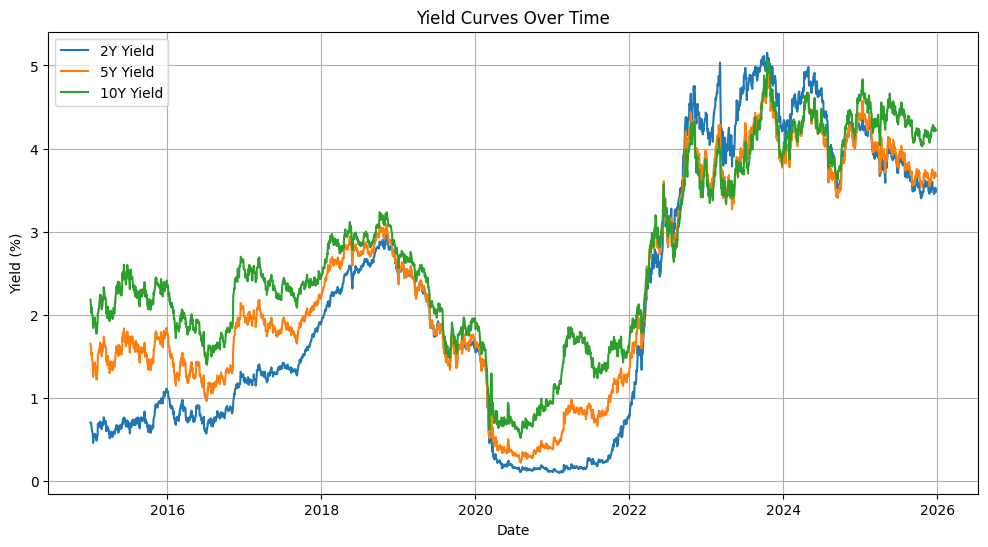

In [18]:
plt.figure(figsize=(12,6))
plt.plot(yields.index, yields['2Y'], label='2Y Yield') 
plt.plot(yields.index, yields['5Y'], label='5Y Yield')
plt.plot(yields.index, yields['10Y'], label='10Y Yield')
plt.title('Yield Curves Over Time')
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid()
plt.show()

Principal Component 1:
  Explained Variance: 0.9137
  Loadings: [0.52170038 0.61803408 0.58810083]
Principal Component 2:
  Explained Variance: 0.0776
  Loadings: [ 0.73465571  0.02499874 -0.67797938]
Principal Component 3:
  Explained Variance: 0.0087
  Loadings: [-0.43371615  0.78575374 -0.44100042]


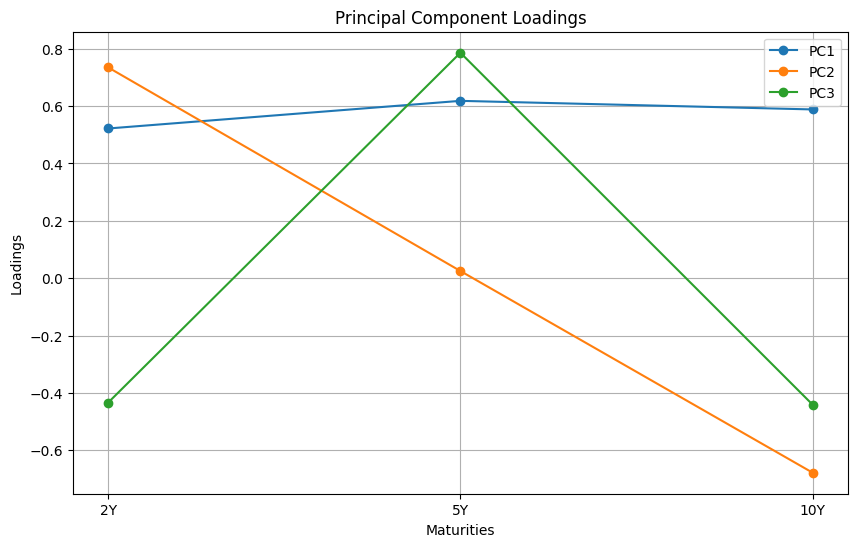

In [24]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
yields_diff_scaled = scaler.fit_transform(yields_diff)

pca = PCA(n_components=3)
pca.fit(yields_diff)
explained_variance = pca.explained_variance_ratio_
components = pca.components_
for i, (var, comp) in enumerate(zip(explained_variance, components), start=1):
    print(f"Principal Component {i}:")
    print(f"  Explained Variance: {var:.4f}")
    print(f"  Loadings: {comp}")

labels = ['2Y','5Y','10Y']
x = np.arange(len(labels))
width = 0.25    

plt.figure(figsize=(10,6))
plt.plot(labels, components[0], marker='o', label='PC1')
plt.plot(labels, components[1], marker='o', label='PC2')
plt.plot(labels, components[2], marker='o', label='PC3')
plt.title('Principal Component Loadings')
plt.xlabel('Maturities')
plt.ylabel('Loadings')
plt.legend()
plt.grid()
plt.show()